머신러닝을 배울 때는 인공적으로 만들어진 데이터셋이 아닌 실제 데이터로 실험해보는 것이 가장 좋다.
여러 분양 걸쳐 공개된 데이터셋이 아주 많이 있고, 다음은 데이터를 구하기 가장 좋은 곳이다.

- 유명한 공개 데이터 저장소
    - UC 얼바인(Irvine) 머신러닝 저장소(http://archive.ics.uci.edu/ml)
    - 캐글(Kaggle) 데이터셋(http://www.kaggle.com/datasets)
    - 아마존 AWS 데이터셋(https://registry.opendata.aws)

- 메타 포털(공개 데이터 저장소가 나열되어 있다.)
    - 데이터 포털(Data Portals)(http://dataportals.org)
    - 오픈 데이터 모니터(Open Data Monitor)(http://opendatamonitor.eu)
    - 퀀들(Quandl)(http://quandl.com)

- 인기 있는 공개 데이터 저장소가 나열되어 있는 다른 페이지
    - 위키백과 머신러닝 데이터셋 목록(https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
    - Quora.com(https://homl.info/10)
    - 데이터셋 서브레딧(subreddit)(http://www.reddit.com/r/datasets)

chapter 2에서는 StatLib 저장소에 있는 캘리포니아 주택 가격(California Housing Prices)데이터 셋을 사용한다.

## Download datasets

맨 처음 할 일은 캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델을 만드는 것이다.  

이 데이터는 캘리포니아의 블록 그룹마다 인구, 중간 소득, 중간 주택가격 등을 담고 있다.  
블록 그룹은 미국 인구조사국에서 샘플 데이터를 발표하는 데 사용하는 최소한의 지리적 단위. 하나의 블록 그룹은 보통 600 ~ 3000명의 인구를 나타낸다.(여기서는 간단하게 구역이라고 부르겠다.)  

이 데이터로 모델을 학습시켜서 다른 측정 데이터가 주어졌을 때, 구역의 중간 주택 가격을 예측해야 한다.

## 문제 정의 1. 비즈니스의 목적이 정확히 무엇인가?
상사에게 첫 번째로 할 질문은 "비즈니스의 목적이 정확히 무엇인가요?"이다.  
모델 만들기가 최종 목적은 아닐 것이다. 회사에서는 이 모델을 어떻게 사용해 이익을 얻으려고 할까? 목적을 아는 것은 문제를 어떻게 구성할지, 어떤 알고리즘을 선택할지, 모델 평가에 어떤 성능 지표를 사용할지, 모델 튜닝을 위해 얼마나 노력을 투여할지 결정하기 때문에 아주 중요하다.

상사가 이 모델의 출력(구역의 중간 주택 가격에 대한 예측)이 여러 가지 다른 신호와 함께 다른 머신러닝 시스템의 입력으로 사용된다고 이야기한다.  
뒤따르는 시스템이 해당 지역에 투자할 가치가 있는지 결정한다. 이 결정이 수익에 직결되기 때문에 올바르게 예측하는 것은 매우 중요하다.

![1](doc_img/chapter2_1.png)

- <u>컴포넌트</u>  
    컴포넌트를 한마디로 표현하자면 소프트웨어 시스템에서 독립적인 업무 또는 독립적인 기능을 수행하는 모듈로 이후 시스템을 유지보수 하는데 있어 교체 가능한 부품이다.
    소프트웨어 컴포넌트는 하드웨어의 그래픽 카드와 같은 개념으로 독립적인 기능을 수행하는 소프트웨어 모듈이라고 설명할 수 있으며, 소프트웨어 컴포넌트는 컴포넌트라는 말로 대체되어 사용되고 있다.
    

- 파이프라인  
    데이터 처리 컴포넌트(component)들이 연속되어 있는 것을 데이터 파이프라인(pipeline)이라고 한다.  
    머신러닝 시스템은 데이터를 조작하고 변환할 일이 많아 파이프라인을 사용하는 일이 매우 흔하다.

    보통 컴포넌트들은 비동기적으로 동작한다. 각 컴포넌트는 많은 데이터를 추출해 처리하고 그 결과를 다른 데이터 저장소로 보낸다.  
    그러면 일정 시간 후 파이프라인의 다음 컴포넌트가 그 데이터를 추출해 자신의 출력 결과를 만든다. 각 컴포넌트는 완전히 독립적이다.  
    즉, 컴포넌트 사이의 인터페이스는 데이터 저장소뿐이다. 이는 시스템을 이해하기 쉽게 만들고, 각 팀은 각자의 컴포넌트에 집중할 수 있다.  
    한 컴포넌트가 다운되더라도 하위 컴포넌트는 문제가 생각 컴포넌트의 마지막 출력을 사용해 평상시와 같이 계속 동작할 수 있다. 그래서 시스템이 매우 견고해진다.


<u>여기서는 전반적인 시스템 구조를 명시하고자 하는 것 같다.</u>  
예를 들어 A와 B라는 컴포넌트가 있다고 할때, 
 - 각 컴포넌트는 다른 컴포넌트들과는 비동기적이다.
 - A컴포넌트가 처리한 데이터를 저장소에 저장해두면 다음 단계의 컴포넌트, B컴포넌트가 이를 처리하고 결과를 저장소에 저장한다.
 - 즉, 저장소를 제외하면 각 컴포넌트는 다른 컴포넌트에 영향을 주지도, 받지도 않고, 저장소에 있는 데이터를 처리하기만 하는 독립적인 형태를 구성하고 있다는 것.

그림을 통해 이해하자면, 
 - 처음 상위 컴포넌트에 구역 데이터가 입력, 처리되어 구역 가격을 결정하게 된다. 여기서 A라는 컴포넌트가 동작한 것이고, 그 결과가 저장소에 저장되었다.
 - 이후 나의 컴포넌트라고 되어있는 것을 B컴포넌트라 할때, A컴포넌트와는 독립적으로 동작하게 되고, 사실상 A와의 접점은 저장소에 들어있는 A컴포넌트가 처리한 데이터 밖에 없다.


## 문제 정의 2. 현재 솔루션은 어떻게 구성되어 있는가?
다음으로 상사에게 던질 질문은 '현재 솔루션은 어떻게 구성되어 있나요?' 이다.  
현재 상황은 문제 해결 방법에 대한 정보는 물론이고 참고 성능으로도 사용할 수 있다.  
상사가 현재는 구역 주택 가격을 전문가가 수동으로 추정한다고 알려주었다. 한 팀이 구역에 관한 최신 정보를 모으고 있는데, 중간 주택 가격을 얻을 수 없을 때는 복잡한 규칙을 사용하여 추정한다.

이는 비용과 시간이 많이 들고 추정 결과도 썩 좋지 못하다.  
실제 중간 주택 가격을 구해보면 팀에서 추정한 것이 20% 이상 벗어났을 때가 많다. 이런 이유로 회사는 구역의 데이터를 기반으로 중간 주택 가격을 예측하는 모델을 훈련시키는 쪽이 유용하다고 생각한다.  
인구 조사 데이터에는 다른 데이터는 물론 수천 개의 중간 주택 가격을 포함하므로 이 작업에 매우 적합한 데이터셋으로 보인다.

이제 이런 정보들을 가지고 시스템을 설계할 준비가 되었다.  
먼저 문제를 정의해야 한다. 
 - **label된 훈련 샘플**이 있으니 전형적인 **지도 학습 작업**.
 - **값을 예측** 해야하므로 전형적인 **회귀 문제**.
 - **예측에 사용할 특성이 여러 개**이므로 **다중 회귀(multiple regression)**
 - 각 구역마다 **하나의 값을 예측하므로** **단변량 회귀(univariate regression)**, 구역마다 **여러 값을 예측한다면** **다변량 회귀(multivariate regression)**
 - 이 시스템으로 들어오는 데이터에 연속적인 흐름이 없으므로 빠르게 변하는 데이터에 적응하지 않아도 되고, 데이터가 메모리에 들어갈 만큼 충분히 작으므로 일반적인 배치 학습이 적절.

정리
---------
1. 비즈니스의 목적. 즉, 생성한 모델을 통해 얻으려는 것이 무엇인가를 파악해야 한다. 이를 통해 사용하려는 모델, 알고리즘 등 전반적인 사항들을 결정한다.
2. 현재 솔루션은 어떻게 구성되어 있나. 현재 우리가 가진 해결 방안이 어떤 것이 있는가? 이것이 효과적인 방법인가 혹은 그리 좋지 못한 방안일 경우 이를 타개할 방법은 무엇이 있는가?

## 성능 측정 지표 선택
다음 단계는 성능 측정 지표를 선택하는 것이다. 회귀 문제의 전형적인 성능 지표는 **평균 제곱근 오차 <sup>Root Mean Square Error - RMSE</sup>** 이다.  
오차가 커질수록 이 값은 더욱 커지므로 예측에 얼마나 많은 오류가 있는지 가늠하게 해준다.  
![2](doc_img/chapter2_2.png)


 - m은 RMSE를 측정할 데이터셋에 있는 샘플 수. 예로 2000개 구역의 검증 세트에 대해 RMSE를 평가한다면 m = 2,000이다.  

 - $x^{(i)}$ 는 데이터셋에 있는 i번째 샘플(label을 제외한)의 전체 특성값의 벡터이고,  
   $y^{(i)}$ 는 해당 레이블(해당 샘플의 기대 출력값)이다.  
   ex) -118.29°, 위도 33.91°에 위치하고, 중간 소득이 $38,372이며, 주민이 1,416명, 중간 주택 가격이 $156,400라면,  
   ![4](doc_img/chapter2_5.png)
   ![5](doc_img/chapter2_6.png)


 - X는 데이터셋에 있는 모든 샘플의 모든 특성값(label은 제외)을 포함하는 행렬이다.   
 샘플하나가 하나의 행이어서 i번째 행은 $x^{(i)}$의 **전치**와 같고 $(x^{(i)})^T$으로 표기한다.  
 예를 들어 첫 번째 구역이 앞의 예와 같다면 행렬 X는 다음과 같다.  
 ![6](doc_img/chapter2_7.png)


 - h는 시스템의 예측 함수이며 가설(hypothesis)이라고도한다. 시스템이 하나의 샘플 특성 백터 x<sup>(i)</sup>를 받으면  
   그 샘플에 대한 예측값  $y\hat{}^{(i)} = h(x^{(i)})$를 출력한다.  (y hat이라 읽음)
   ![7](doc_img/chapter2_8.png)

    예를 들어 시스템이 첫 번째 구역의 중간 주택 가격을 $\158,400$라고 예측한다면 $\y\hat{}^{(i)} = h(x^{(i)})$ = 158,400이다.
      
    이 구역에 대한 예측 오차는 ![8](doc_img/chapter2_9.png)
    <u>가설을 이용해서 얻은 예측값 $\y\hat{}^{(1)}$에서 ground truth값 $y^{(1)}$값을 뺀 값이 오차.</u>


 - RMSE(X, h)는 **가설 h를 사용하여 일련의 샘플을 평가하는 비용 함수(cost function)이다.**
   <u>예로 이미지 분류 문제에서는 cross_entropy가 cost function에 해당하며, NN내에서 적용되는 Softmax, Sigmoid와 Relu등은 Activation function</u> <sup>활성화 함수</sup><u>이다.</u>


RMSE가 일반적으로 회귀 문제에 선호되는 성능 측정 방법이지만 경우에 따라 다른 함수를 사용할 수도 있다.  
예를 들어 이상치로 보이는 구역이 많다고 가정하면, 평균 절대 오차<sup>Mean Absolute Error</sup>(평균 절대 편차 <sup>Mean Absolute Deviation</sup> 라고도 한다)를 고려해볼 수 있다.  
![img](doc_img/chapter2_10.png)

RMSE와 MAE 모두 예측값의 벡터와 타깃값의 벡터 사이의 거리를 재는 방법이다. 거리 측정에는 여러가지 방법(또는 Norm)이 가능하다.

 - <u>**Norm**이란</u>  
   벡터의 길이 혹은 크기를 측정하는 방법(함수). 쉽게 벡터에서는 벡터의 크기 혹은 길이를 의미한다고 보면된다.  
   벡터의 크기 = 벡터의 norm = $||x||$

 - 제곱항을 합한 것의 제곱근(RMSE) 계산은 유클리디안 노름(Euclidean Norm)에 해당한다. $l_{\2}$ 노름이라고도 부르며 다음과 같이 표시한다.
   ![img](doc_img/chapter2_12.png)
 

 - 절댓값의 합을 계산하는 것은 $l_{\1}$ 노름에 해당하며 다음과 같이 표기한다. ![img](doc_img/chapter2_13.png)  
   이는 도시의 구획이 직각으로 나뉘어 있을 때 이 도시의 두 지점 사이의 거리를 측정하는 것과 같아 맨해튼 노름(Manhattan Norm)이라고도 한다.
 
 
 - 일반적으로 원소가 n개인 벡터 v의 $l_{\k}$노름은 다음과 같이 정의한다.
   ![img](doc_img/chapter2_14.png)  
   $l_{\0}$은 단순히 벡터에 있는 0이 아닌 원소의 수이고, $l_{\infty}$는 벡터에서 가장 큰 절댓값이 된다.


 - 노름의 지수가 클수록 큰 값의 원소에 치우치며 그래서 RMSE가 MAE보다 조금 더 이상치에 민감하다. 하지만 이상치가 매우 드물면 RMSE가 잘 맞아 일반적으로 널리 사용된다.

## 데이터 구조 훑어보기

다음 코드를 통해 데이터를 추출하도록 한다.

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()를 호출하면 현재 작업공간에 datasets/housing 디렉터리를 만들고 housing.tgz파일을 내려받고 같은 디렉터리에 압축을 풀어 housing.csv 파일을 만든다.

In [2]:
fetch_housing_data()

이제 Pandas를 사용해 데이터를 읽는다. 데이터를 읽는 간단한 함수도 만들도록한다.

In [3]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

DataFrame의 head()메서드를 사용해 처음 다섯 행을 확인해보자.

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


각 행은 하나의 구역을 나타낸다.  
특성은 longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity등 10개로 구성

info()메서드는 데이터에 대한 간략한 설명과 특히 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수를확인하는데 유용하다.

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


데이터 셋에 20,640개의 샘플이 들어 있다.  
total_bedromms 특성은 20,433개만 널 값이아니다. 나머지 207개의 구역은 이 특성을 가지고 있지 않다는 뜻이다.

ocean_proximity 필드만 빼고 모든 특성이 숫자형이다.  
ocean_proximity 필드의 데이터 타입이 object이므로 어떤 python 객체도 될 수 있지만, 데이터를 CSV 파일에서 읽어들였기 때문에 Text 특성일 것이다.  

처음 다섯 행을 출력했을 때 ocean_proximity 열의 값이 반복되는 것으로 봐서(처음 다섯 행의 ocean_proximity는 모두 NEAR BAY이다.) 이 특성은 아마도 범주형<sup>categorical</sup>일 것이다.  
어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구역이 있는지 value_counts()메서드로 확인한다. 

<u>범주형이라는 것은 정해진 N개의 class내에서 어떠한 값을 가지고 있다는 것을 뜻하는 것 같다.</u>

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

다른 필드도 살펴보도록 하자.  
describe()메서드는 숫자형 특성의 요약 정보를 보여준다.

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


count, mean, min, max행이 의미하는 바는 쉽게 알 수 있다. 
 - 널 값이 제외된 것을 볼 수 있다.(예로 total_bedrooms의 count는 20640이 아니고 20433이다.)
 - std행은 값이 퍼져 있는 정도를 측정하는 표준편차를 나타낸다.
 - 25%, 50%, 75% 행은 백분위수<sup>percentile</sup>를 나타낸다.  
   백분위수는 전체 관측값에서 주어진 백분율이 속하는 하위 부분의 값을 나타낸다.  
   예를 들어 25% 구역은 housing_median_age가 18보다 작고 50%는 29보다 작고, 75%는 37보다 작다.
   이를 25번째 백분위수(또는 제1사분위수), 중간값, 75번째 백분위수(또는 제3사분위수)라고도 한다.

데이터의 형태를 빠르게 검토하는 다른 방법은 각 숫자형 특성을 히스토그램으로 그려보는 것이다.  
히스토그램은 주어진 값의 범위(수평축)에 속한 샘플 수(수직축)를 나타낸다. 특성마다 따로 히스토그램을 그릴 수도 있고,  
전체 데이터셋에 대해 hist()메서드를 호출하면 모든 숫자형 특성에 대한 히스토그램을 출력한다.

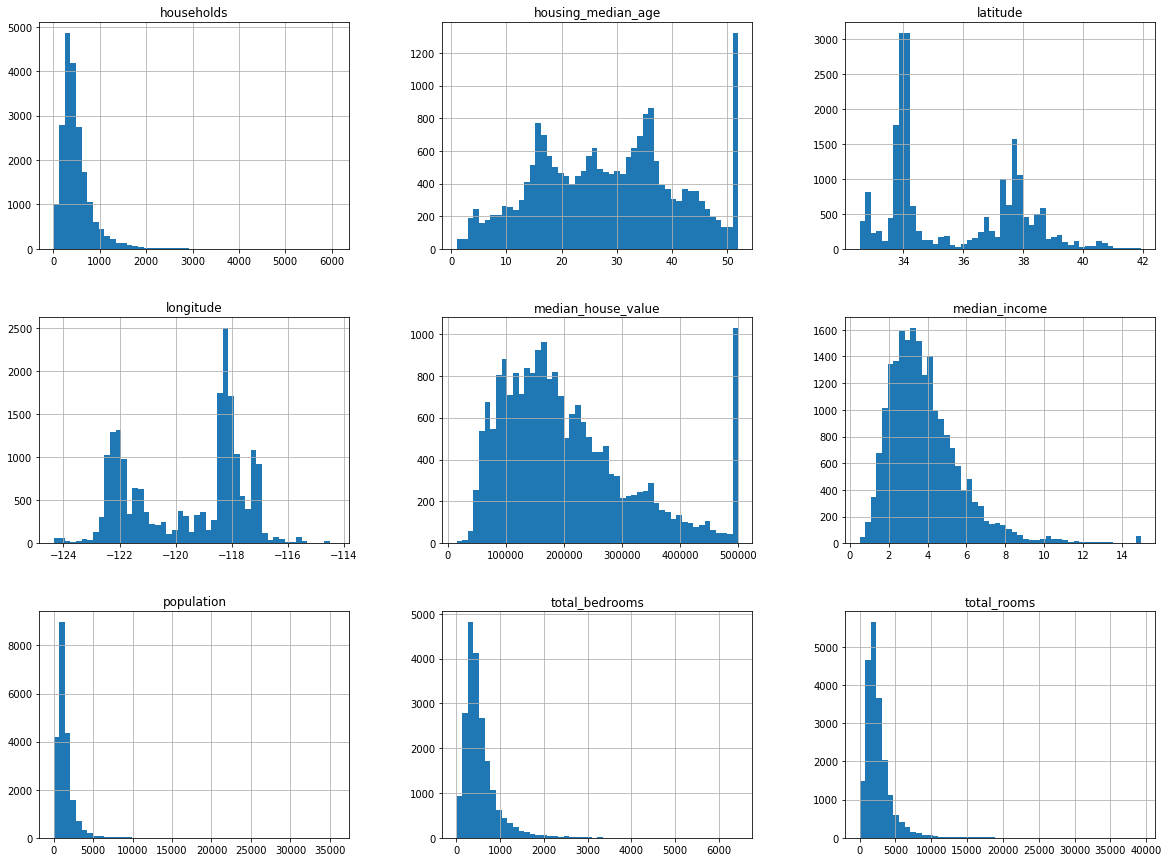

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

위 히스토그램에서 몇 가지 사항을 확인할 수 있다.  

1. 먼저 중간 소득<sup>median income</sup> 특성이 US달러로 표현되어 있지 않은 것 같다.  
   데이터를 취합한 팀에 확인을 해보니 스케일을 조정하고, 상한이 15(실제로는 15.0001), 하한이 0.5(실제로는 0.4999)가 되도록 만들었다고 한다. 대략 수만 달러를 나타낸다.  
   머신러닝에서는 전처리된 데이터를 다루는 경우가 흔하고 이것이 문제가 되지는 않지만 데이터가 어떻게 계산된 것인지 반드시 이해하고 있어야 한다.
       
2. 중간 주택 연도<sup>housing median age</sup>와 중간 주택 가격<sup>median house value</sup> 역시 최댓값과 최솟값을 한정했다.  
   중간 주택 가격의 경우는 타깃 속성(label)으로 사용되기 때문에 심각한 문제가 될 수 있다. 가격이 한계값을 넘어가지 않도록 머신러닝 알고리즘이 학습될지 모른다.  
   만약 $\$500,000$를 넘어가더라도 정확한 예측 값이 필요하다고 하면 우리가 선택할 수 있는 방법은 두 가지이다.  

   2-1. 한계값 밖의 구역에 대한 정확한 label을 구한다.  
   2-2. 훈련 세트에서 이런 구역을 제거한다. $500,000가 넘는 값에 대한 예측은 평가 결과가 매우 나쁠 것이므로 테스트 셋에서도 제거한다.  

3. 특성들의 스케일이 서로 많이 다릅니다. 특성 스케일링에 대해서는 뒷 내용에서 살펴보자.

4. 마지막으로 많은 히스토그램의 꼬리가 두껍다. 가운데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어 있다.  
  이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만든다. 나중에 이런 특성들을 좀 더 종모양의 분포가 되도록 변형시키겠다.

5. 데이터를 깊게 들여다보기 전에 테스트 셋을 따로 떼어놓아야 한다. 그리고 테스트 세트를 절대 들여다 보면 안된다.

## 테스트 세트 만들기

우리의 뇌는 매우 과대적합되기 쉬운 엄청난 패턴 감지 시스템이다. 만약 테스트 셋을 들여다본다면, 테스트셋에서 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될지도 모른다.  
이 테스트 셋으로 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 런칭했을 때 기대한 성능이 나오지 않을 것이다.  
이를 데이터 스누핑<sup>data snooping</sup> 편향이라고 한다.

테스트 세트를 생성하는 일은 이론적으로 간단하다.  
무작위로 어떤 샘플을 선택해서 데이터셋의 20% 정도를 떼어놓으면 된다.

In [13]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(housing, 0.2)

In [15]:
len(train_set)

16512

In [16]:
len(test_set)

4128